In [4]:
import pandas as pd, numpy as np
import os, shutil
from glob import glob
from tqdm import tqdm
import pydicom as dicom
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Back, Style
sns.set(style='dark')

In [5]:
# Directory with dataset
dataset_dir = 'data/cbis-ddsm-breast-cancer-image-dataset'

In [6]:
# Read meta data and change image paths
df = pd.read_csv(f'{dataset_dir}/csv/dicom_info.csv')
df['image_path'] = df.image_path.apply(lambda x: x.replace('CBIS-DDSM', dataset_dir))

FileNotFoundError: [Errno 2] No such file or directory: 'data/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv'

In [ ]:
def show_img(path):
    img = cv2.imread(path,0)
    plt.figure(figsize=(10,10))
    plt.imshow(img,cmap='bone')

In [ ]:
# Show an image example
show_img(df.image_path.iloc[10])

In [6]:
%%time
import imagesize
data = df['image_path'].map(lambda path: imagesize.get(path))
width, height = list(zip(*data))
df['width'] = width
df['height'] = height

CPU times: user 781 ms, sys: 2.33 s, total: 3.11 s
Wall time: 3min 43s


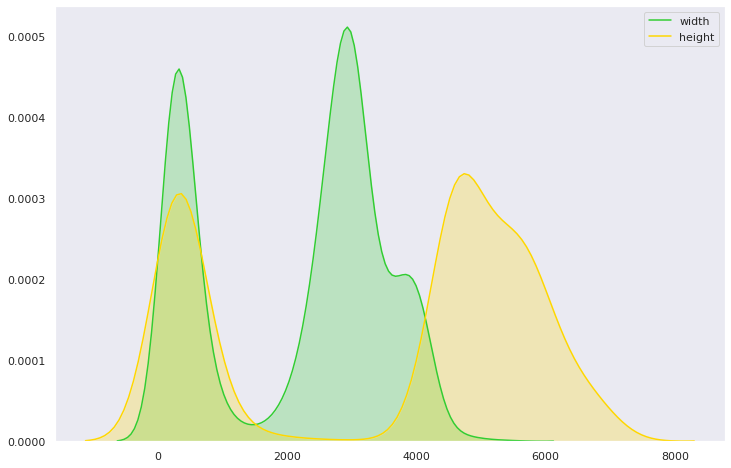

In [7]:
# Weight and height distribution
plt.figure(figsize=(12,8))
sns.kdeplot(df['width'], shade=True, color='limegreen')
sns.kdeplot(df['height'], shade=True, color='gold')
plt.legend(['width','height'])

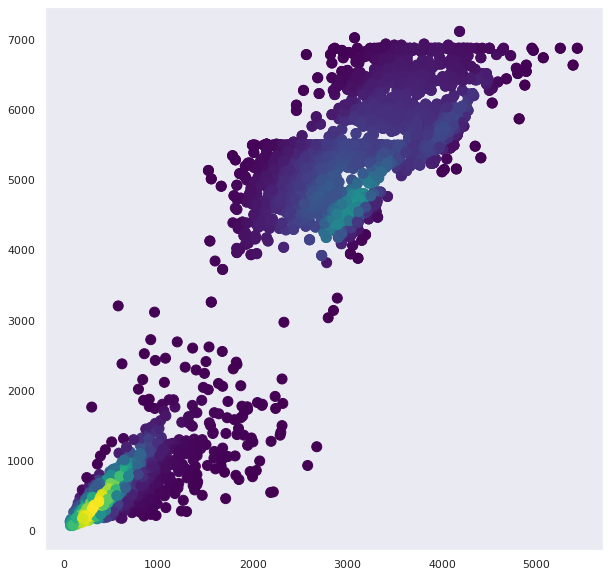

In [8]:
# Aspect ratio
from scipy.stats import gaussian_kde

x_val = df.width.values
y_val = df.height.values

# Calculate the point density
xy = np.vstack([x_val,y_val])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize = (10, 10))
# ax.axis('off')
ax.scatter(x_val, y_val, c=z, s=100, cmap='viridis')
# ax.set_xlabel('x_mid')
# ax.set_ylabel('y_mid')
plt.show()

In [9]:
# One row
for info in zip(df.iloc[0].index, df.iloc[0]):
    print(f'{Fore.GREEN}{info[0]}{Style.RESET_ALL}:',info[1])

file_path: CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.dcm
image_path: data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
AccessionNumber: nan
BitsAllocated: 16
BitsStored: 16
BodyPartExamined: BREAST
Columns: 351
ContentDate: 20160426
ContentTime: 131732.685
ConversionType: WSD
HighBit: 15
InstanceNumber: 1
LargestImagePixelValue: 65535
Laterality: R
Modality: MG
PatientBirthDate: nan
PatientID: Mass-Training_P_01265_RIGHT_MLO_1
PatientName: Mass-Training_P_01265_RIGHT_MLO_1
PatientOrientation: MLO
PatientSex: nan
PhotometricInterpretation: MONOCHROME2
PixelRepresentation: 0
ReferringPhysicianName: nan
Rows: 289
SOPClassUID: 1.2.840.10008.5.1.4.1.1.7
SOPInstanceUID: 1.3.6.1.4.1.9590.100.1.2.426380754911844882201419900442081103076
SamplesPerPixel: 1
SecondaryCaptureDeviceManufacturer: MathWorks
SecondaryCaptureDeviceManufacturerModelName: MATLAB
SeriesDescription: cropped 

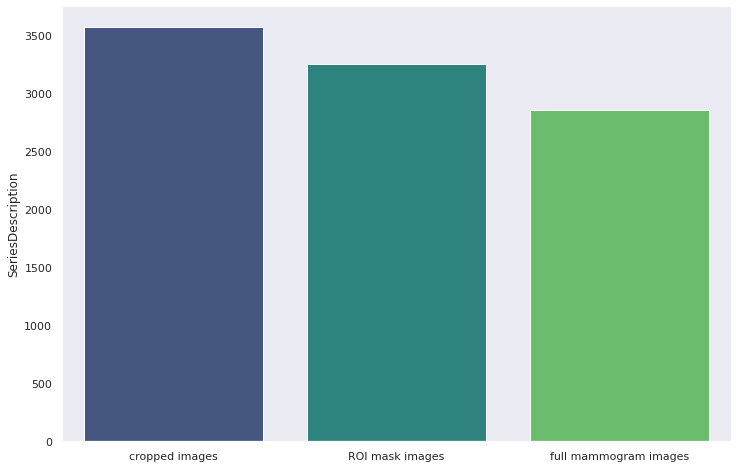

In [10]:
# Types of images
plt.figure(figsize=(12,8))
sns.barplot(df.SeriesDescription.value_counts(dropna=False).index, df.SeriesDescription.value_counts(dropna=False), palette='viridis')
#.plot.bar(rot=0, color=['deepskyblue', 'royalblue', 'deeppink'])

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

def show_grid(files, row=3, col=3):
    grid_files = random.sample(files, row*col)
    images     = []
    for image_path in tqdm(grid_files):
        img          = cv2.resize(cv2.imread(image_path), dsize=(512,512))
        images.append(img)

    fig = plt.figure(figsize=(col*5, row*5))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(col, row),  # creates 2x2 grid of axes
                     axes_pad=0.05,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

100%|██████████| 12/12 [00:00<00:00, 28.77it/s]


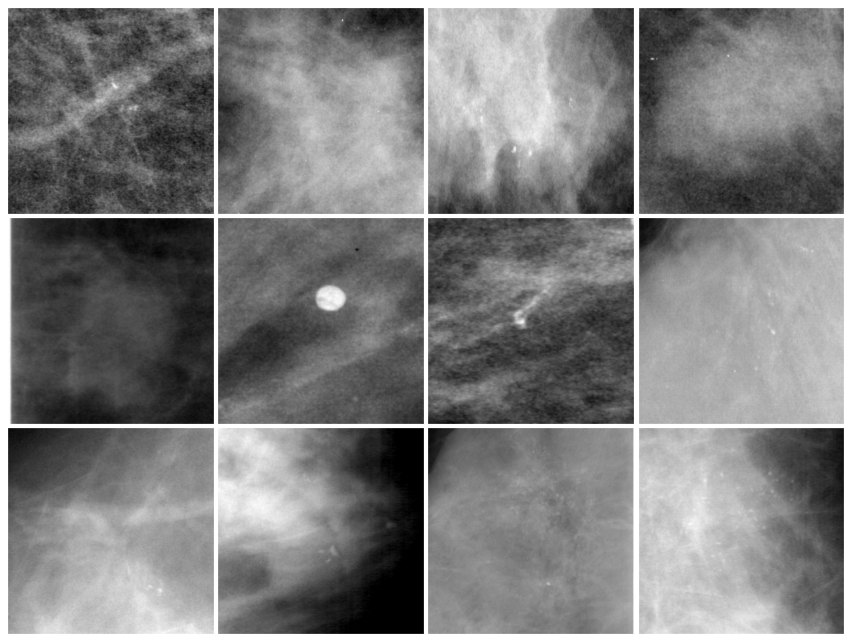

In [13]:
# Cropped
show_grid(df[df.SeriesDescription=='cropped images'].image_path.tolist(), row=4)

100%|██████████| 12/12 [00:02<00:00,  4.28it/s]


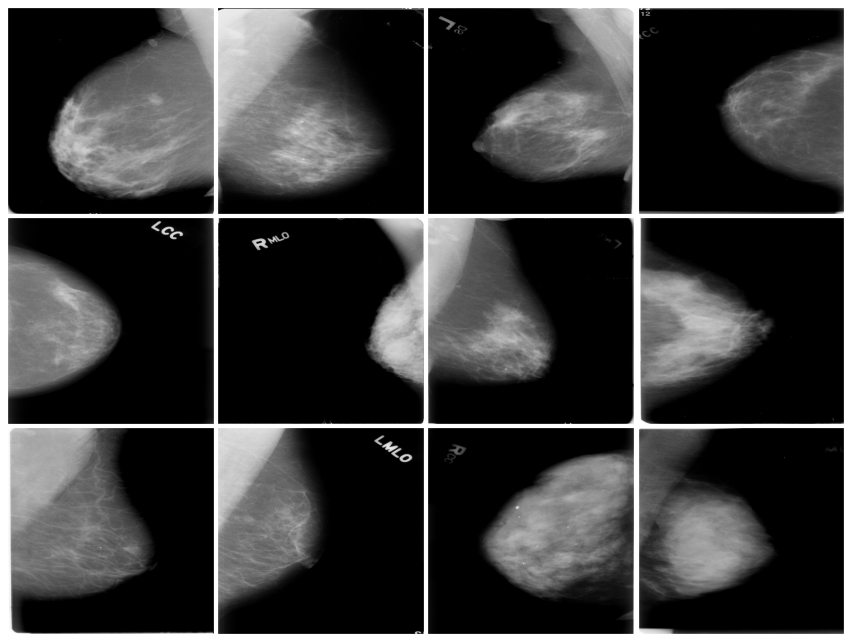

In [14]:
# Full mammography
show_grid(df[df.SeriesDescription=='full mammogram images'].image_path.tolist(), row=4)

100%|██████████| 12/12 [00:01<00:00,  6.29it/s]


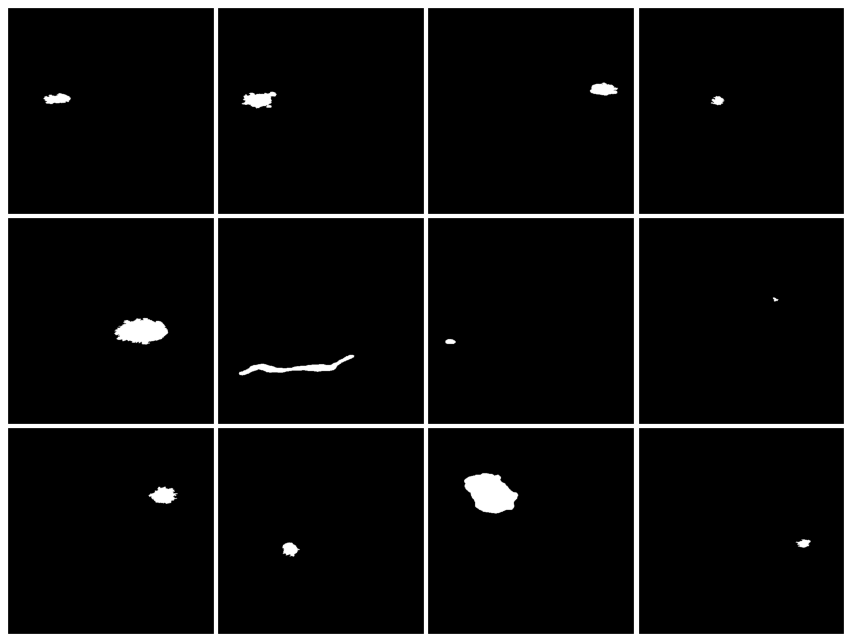

In [15]:
# ROI Mask
show_grid(df[df.SeriesDescription=='ROI mask images'].image_path.tolist(), row=4)

100%|██████████| 12/12 [00:02<00:00,  5.33it/s]


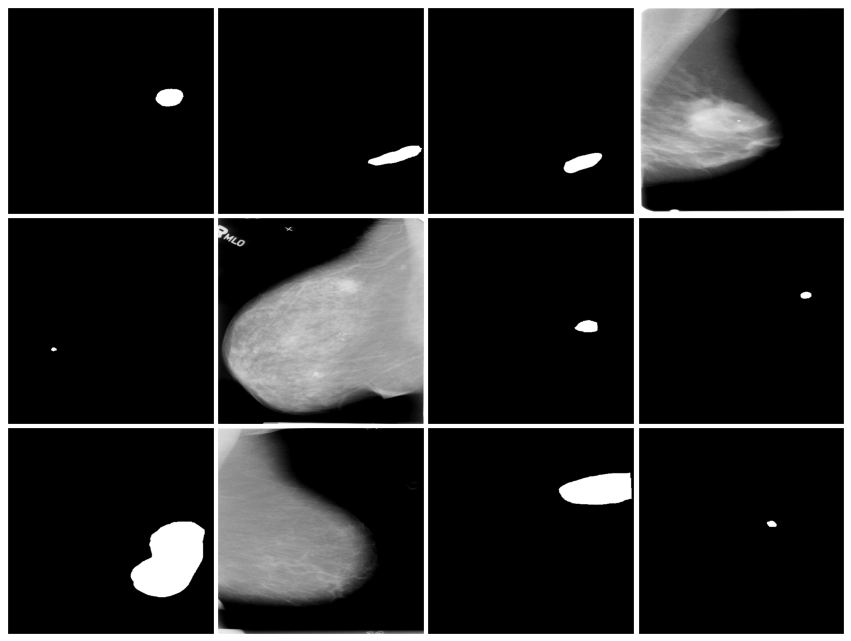

In [16]:
# None
show_grid(df[df.SeriesDescription.isna()].image_path.tolist(), row=4)